### **Importing** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### **Reading the data**

In [3]:
data=pd.read_csv(r"/content/Market Basket Analysis - Groceries_dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38760,4471,8/10/2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


### **Converting date column to datetime and member_number column to string**

In [6]:
data['Member_number'] = data['Member_number'].astype(str)


In [7]:
data.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


### **Checking null values**

In [8]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

### **Checking** **duplicates**

In [9]:
data['itemDescription'].duplicated().sum()

38598

### **Checking the no of unique items in item description column**

In [10]:
data['itemDescription'].nunique()

167

### **Analysis and Visualization**





### 1.**Member Purchase Analysis**


In [11]:
#Total no of purchase per member
member_purchase_counts = data['Member_number'].value_counts()
member_purchase_counts

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

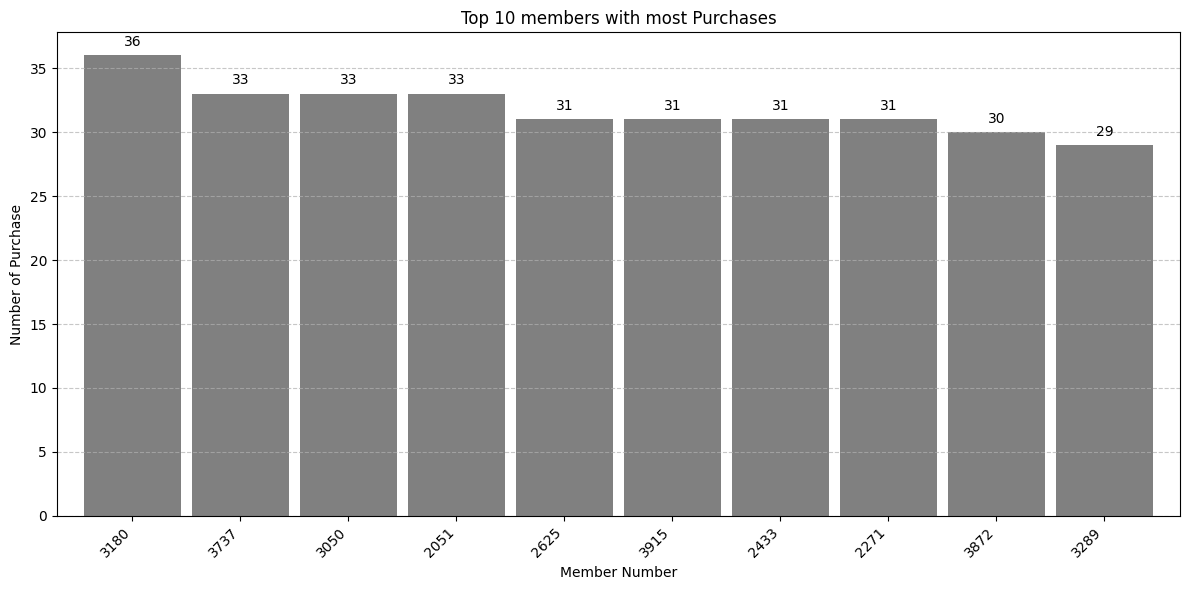

In [12]:
#The top 10 members with most purchases
top_members = member_purchase_counts.head(10)
plt.figure(figsize=(12, 6))

bars = top_members.plot(kind='bar', color='grey', width=0.9)
ticks_positions = range(len(top_members))
ticks_labels = top_members.index
plt.xticks(ticks_positions, ticks_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Member Number')
plt.ylabel('Number of Purchase')
plt.title('Top 10 members with most Purchases')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2.**Item Description Analysis**

In [13]:
# To 10 check for the most Purchased Items
ten_most_purchased_items = data['itemDescription'].value_counts().head(10)
ten_most_purchased_items

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

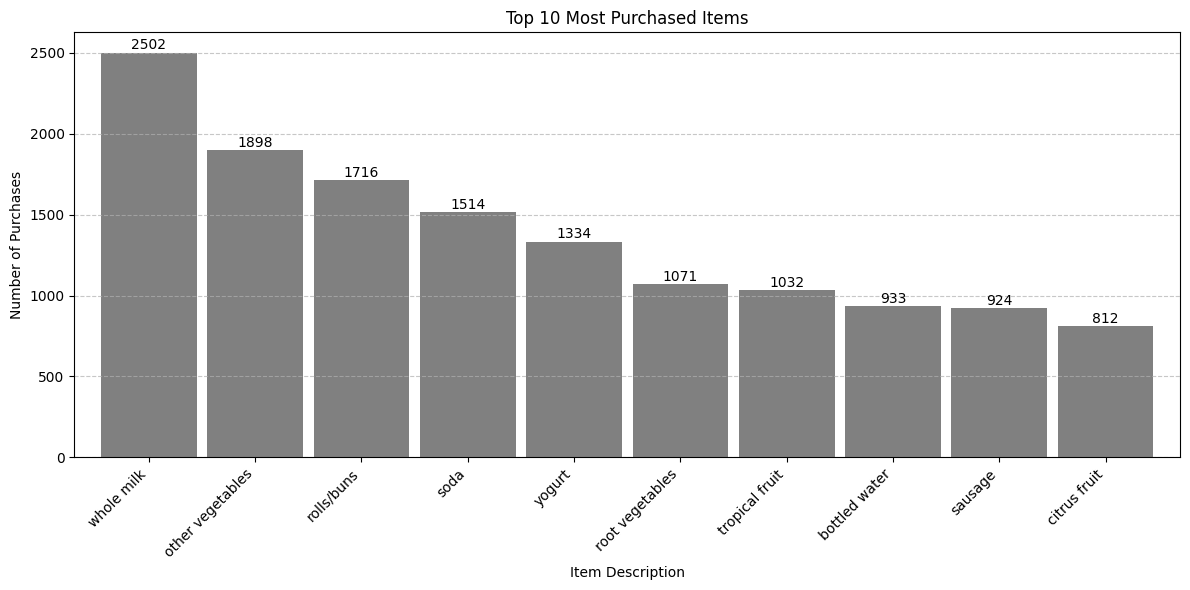

In [14]:
# Visaulizing the top 10 most purchased items
plt.figure(figsize=(12, 6))
bars = ten_most_purchased_items.plot(kind='bar', color='grey', width=0.9)
ticks_positions = range(len(ten_most_purchased_items))
ticks_labels = ten_most_purchased_items.index
plt.xticks(ticks_positions, ticks_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Item Description')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Most Purchased Items')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Top and Least Purchased Items

Popular Items: Whole milk emerges as the most sought-after item, purchased 2502 times, signifying its popularity among customers.
Less Popular Items: Citrus fruits record the lowest purchase count at 812, indicating a comparatively lower demand for this product

### **Market Basket Analysis**

In [16]:
# Group items purchased per customer per day
data['uniqueTransaction'] = data.groupby(['Member_number','Date'])['itemDescription'].transform(lambda x: ' '.join(x))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,uniqueTransaction
0,1808,21-07-2015,tropical fruit,tropical fruit rolls/buns candy
1,2552,5/1/2015,whole milk,whole milk tropical fruit chocolate
2,2300,19-09-2015,pip fruit,pip fruit other vegetables flour
3,1187,12/12/2015,other vegetables,other vegetables onions shopping bags
4,3037,1/2/2015,whole milk,whole milk other vegetables white bread
...,...,...,...,...
38760,4471,8/10/2014,sliced cheese,whole milk yogurt sliced cheese
38761,2022,23-02-2014,candy,cat food yogurt candy
38762,1097,16-04-2014,cake bar,sausage whole milk cake bar
38763,1510,3/12/2014,fruit/vegetable juice,beef canned beer fruit/vegetable juice


In [17]:
basket = pd.crosstab(data['uniqueTransaction'], data['itemDescription'])
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
Instant food products bottled beer butter,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products coffee,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products newspapers,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products pip fruit,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products soda,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwieback specialty chocolate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zwieback tropical fruit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zwieback white bread,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## Using Apriori Algorithm to find items frequently bought together

In [18]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Convert the frequency-based 'basket' into a binary format to avoid warning

In [20]:
 apriori_data = basket.applymap(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Convert the non-boolean DataFrame to a boolean type

In [21]:
apriori_data = apriori_data.astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Generating frequent items using the apriori algorithm

In [22]:
frequent_itemsets = apriori(apriori_data,min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Generating rules usineg the association rules algorithm

In [23]:
rules = association_rules(frequent_itemsets, metric="lift",min_threshold=0)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.103172,0.102184,0.011964,0.115957,1.134789,0.001421,1.015580,0.132443
1,(other vegetables),(rolls/buns),0.102184,0.103172,0.011964,0.117078,1.134789,0.001421,1.015750,0.132297
2,(other vegetables),(soda),0.102184,0.096587,0.010537,0.103115,1.067591,0.000667,1.007279,0.070518
3,(soda),(other vegetables),0.096587,0.102184,0.010537,0.109091,1.067591,0.000667,1.007752,0.070081
4,(whole milk),(other vegetables),0.138624,0.102184,0.015147,0.109264,1.069282,0.000981,1.007948,0.075220
5,(other vegetables),(whole milk),0.102184,0.138624,0.015147,0.148228,1.069282,0.000981,1.011275,0.072167
6,(rolls/buns),(soda),0.103172,0.096587,0.010207,0.098936,1.024327,0.000242,1.002608,0.026481
7,(soda),(rolls/buns),0.096587,0.103172,0.010207,0.105682,1.024327,0.000242,1.002806,0.026288
8,(rolls/buns),(whole milk),0.103172,0.138624,0.016683,0.161702,1.166483,0.002381,1.027530,0.159141
9,(whole milk),(rolls/buns),0.138624,0.103172,0.016683,0.120348,1.166483,0.002381,1.019526,0.165691


### Making Recommendations

In [24]:
rules.sort_values('confidence',ascending=False)[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(sausage),(whole milk),0.059159,0.138624,0.010317,0.174397,1.258061,0.002116,1.043330,0.218024
15,(yogurt),(whole milk),0.085721,0.138624,0.014049,0.163892,1.182284,0.002166,1.030222,0.168635
8,(rolls/buns),(whole milk),0.103172,0.138624,0.016683,0.161702,1.166483,0.002381,1.027530,0.159141
5,(other vegetables),(whole milk),0.102184,0.138624,0.015147,0.148228,1.069282,0.000981,1.011275,0.072167
13,(soda),(whole milk),0.096587,0.138624,0.013720,0.142045,1.024684,0.000331,1.003988,0.026665
9,(whole milk),(rolls/buns),0.138624,0.103172,0.016683,0.120348,1.166483,0.002381,1.019526,0.165691
1,(other vegetables),(rolls/buns),0.102184,0.103172,0.011964,0.117078,1.134789,0.001421,1.015750,0.132297
0,(rolls/buns),(other vegetables),0.103172,0.102184,0.011964,0.115957,1.134789,0.001421,1.015580,0.132443
4,(whole milk),(other vegetables),0.138624,0.102184,0.015147,0.109264,1.069282,0.000981,1.007948,0.075220
3,(soda),(other vegetables),0.096587,0.102184,0.010537,0.109091,1.067591,0.000667,1.007752,0.070081


In [25]:
sub_list = rules[['antecedents','consequents', 'support', 'confidence', 'lift', 'zhangs_metric']]
sub_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,zhangs_metric
0,(rolls/buns),(other vegetables),0.011964,0.115957,1.134789,0.132443
1,(other vegetables),(rolls/buns),0.011964,0.117078,1.134789,0.132297
2,(other vegetables),(soda),0.010537,0.103115,1.067591,0.070518
3,(soda),(other vegetables),0.010537,0.109091,1.067591,0.070081
4,(whole milk),(other vegetables),0.015147,0.109264,1.069282,0.075220
5,(other vegetables),(whole milk),0.015147,0.148228,1.069282,0.072167
6,(rolls/buns),(soda),0.010207,0.098936,1.024327,0.026481
7,(soda),(rolls/buns),0.010207,0.105682,1.024327,0.026288
8,(rolls/buns),(whole milk),0.016683,0.161702,1.166483,0.159141
9,(whole milk),(rolls/buns),0.016683,0.120348,1.166483,0.165691


### **Zhang** **Metric**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


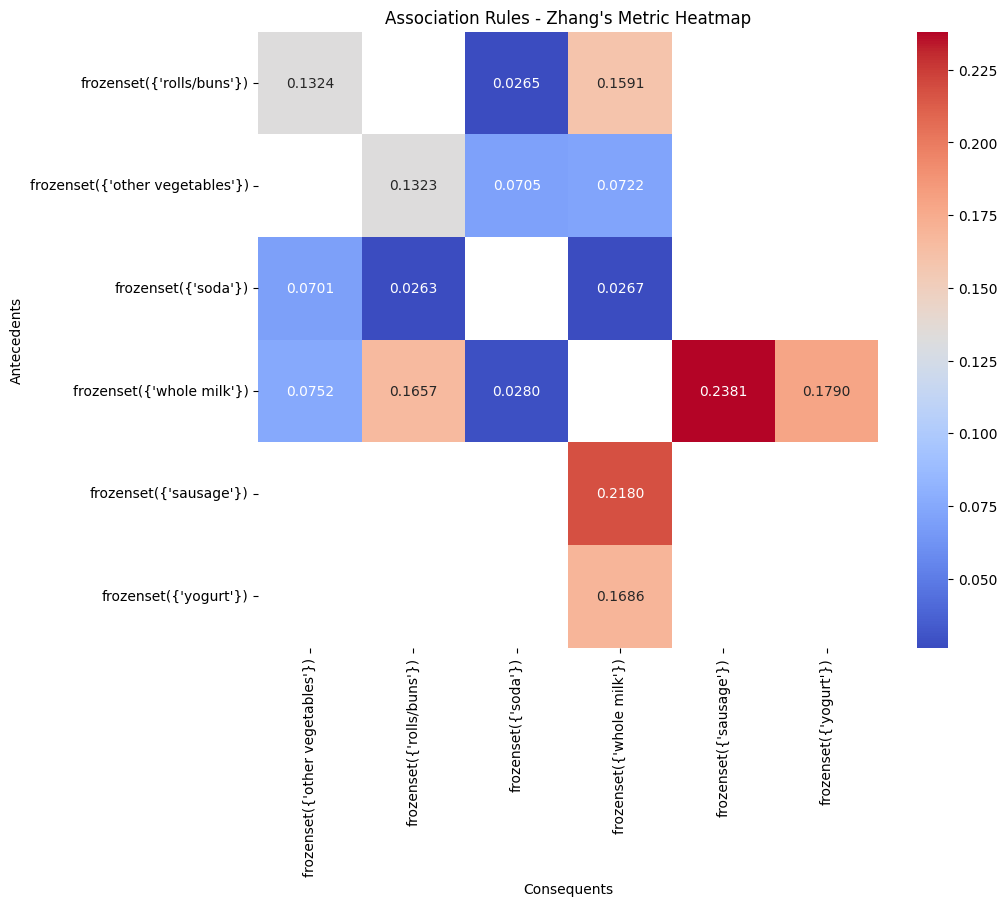

In [26]:
# Extracting the columns for antecedents, consequents, and Zhang's metric from the rules DataFrame
data = rules[['antecedents', 'consequents', 'zhangs_metric']]

# Reformatting the data to create a pivot table for visualization
pivot = data.pivot(index='antecedents', columns='consequents', values='zhangs_metric')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.4f')
plt.title("Association Rules - Zhang's Metric Heatmap")
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


**Interpretation:**

1.A moderate association exists between 'Other Vegetables' and 'Rolls/Buns' (Zhang's metric value: 0.1324).

2.There's a moderate association between 'Soda' and 'Whole Milk' (Zhang's metric value: 0.028).

3.There's a relatively strong association between 'Whole Milk' and 'Sausage' (Zhang's metric value: 0.2381).

4.A moderate association exists between 'Whole Milk' and 'Yogurt' (Zhang's metric value: 0.179).

5.Empty cells (containing 0) indicate no association or very weak association between those particular pairs of items based on Zhang's metric.

6.The diagonal line represents the same item compared to itself, so the value is typically 1 (indicating a perfect association with itself).

**Recommendations:**

1.Placement: Arrange webpages to showcase associated items like 'Whole Milk' and 'Sausage' in close proximity or suggest them together on the same page. Highlight bundles such as 'Other Vegetables' and 'Rolls/Buns' on the homepage or category pages to catch customer attention. Display visually related items like 'Whole Milk' and 'Yogurt' side by side or in a carousel to encourage exploration.

2.Enhanced Product Pages: Include related items such as 'Soda' and 'Whole Milk' or 'Whole Milk' and 'Yogurt' on individual product pages. Showcase promotions that pair associated products, signaling value in purchasing them together.

3.Checkout & Cart Optimization: During checkout, recommend complementary items such as 'Sausage' or 'Yogurt' to the ones in the cart. Offer discounts when customers add associated items like 'Other Vegetables' to their carts, incentivizing additional purchases.

4.Dynamic Page Elements: Utilize user behavior data to dynamically adjust item placements for each visitor, showcasing items based on their browsing history or past purchases. Curate themed collections featuring associated items such as 'Whole Milk' and 'Soda' for seasonal campaigns or holidays.

Further Analysis using other measures

In [27]:
rule1 = sub_list[(sub_list['lift'] >=1.18) & (sub_list['confidence'] >= 0.1)]
rule1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,zhangs_metric
10,(sausage),(whole milk),0.010317,0.174397,1.258061,0.218024
14,(whole milk),(yogurt),0.014049,0.101346,1.182284,0.178992
15,(yogurt),(whole milk),0.014049,0.163892,1.182284,0.168635


In [28]:
#creating rules based on condition
rule2 = sub_list[sub_list['zhangs_metric'] >= 0.1]
rule2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,zhangs_metric
0,(rolls/buns),(other vegetables),0.011964,0.115957,1.134789,0.132443
1,(other vegetables),(rolls/buns),0.011964,0.117078,1.134789,0.132297
8,(rolls/buns),(whole milk),0.016683,0.161702,1.166483,0.159141
9,(whole milk),(rolls/buns),0.016683,0.120348,1.166483,0.165691
10,(sausage),(whole milk),0.010317,0.174397,1.258061,0.218024
11,(whole milk),(sausage),0.010317,0.074426,1.258061,0.238138
14,(whole milk),(yogurt),0.014049,0.101346,1.182284,0.178992
15,(yogurt),(whole milk),0.014049,0.163892,1.182284,0.168635


In [40]:
# prompt: find highest support with product name and in valuesfrom above dataset

# Find the highest support value in the 'rules' DataFrame
highest_support = rules['support'].max()

# Filter the 'rules' DataFrame to find rows with the highest support value
highest_support_rules = rules[rules['support'] == highest_support]

# Extract the product names from the 'antecedents' and 'consequents' columns
product_names = []
for rule in highest_support_rules.itertuples():
    product_names.append(rule.antecedents.union(rule.consequents))

# Print the product names and the highest support value
print(f"Highest support: {highest_support}")
print(f"Product names: {product_names}")


Highest support: 0.01668313028207661
Product names: [frozenset({'rolls/buns', 'whole milk'}), frozenset({'whole milk', 'rolls/buns'})]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# prompt: find highest confidence with product and value name from above

# Find the highest confidence value in the 'rules' DataFrame
highest_confidence = rules['confidence'].max()

# Filter the 'rules' DataFrame to find rows with the highest confidence value
highest_confidence_rules = rules[rules['confidence'] == highest_confidence]

# Extract the product names from the 'antecedents' and 'consequents' columns
product_names = []
for rule in highest_confidence_rules.itertuples():
    product_names.append(rule.antecedents.union(rule.consequents))

# Extract the product name and the highest confidence value
product_name = list(product_names[0])[0]
highest_confidence_value = highest_confidence

# Print the product name and the highest confidence value
print(f"Highest confidence: {highest_confidence_value}")
print(f"Product name: {product_name}")


Highest confidence: 0.17439703153988867
Product name: sausage


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# prompt: find highest lift with product name from above

highest_lift_item = rules.loc[rules['lift'] == rules['lift'].max(), 'consequents'].iloc[0]
print(f"Product with highest lift: {highest_lift_item}")


Product with highest lift: frozenset({'whole milk'})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
rules.sort_values(["confidence"],axis = 0, ascending = False).head(3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(sausage),(whole milk),0.059159,0.138624,0.010317,0.174397,1.258061,0.002116,1.043330,0.218024
15,(yogurt),(whole milk),0.085721,0.138624,0.014049,0.163892,1.182284,0.002166,1.030222,0.168635
8,(rolls/buns),(whole milk),0.103172,0.138624,0.016683,0.161702,1.166483,0.002381,1.027530,0.159141
